In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Required Packages for EDA
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/Capstone/Disease_symptom_and_patient_profile_dataset.csv')


In [ ]:
#1. Checking description(first 5 and last 5 rows)
df.head()


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [ ]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [ ]:
df.shape

(349, 10)

In [ ]:
# Listing attribute names
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [ ]:
# Checking number of values for each attribute.
df.nunique()

Disease                 116
Fever                     2
Cough                     2
Fatigue                   2
Difficulty Breathing      2
Age                      26
Gender                    2
Blood Pressure            3
Cholesterol Level         3
Outcome Variable          2
dtype: int64

In [ ]:
# Information about the data
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
# Conversion of String columns to numerical
mapping = {'Yes': 1, 'No': 0}

# List of columns to convert
columns_to_convert = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Use the replace method to convert the values in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace(mapping)

In [ ]:
# Define a mapping for the values
mapping = {'Low': 1, 'Normal': 2, 'High': 3}

# List of columns to convert
columns_to_convert = ['Blood Pressure', 'Cholesterol Level']

# Use the replace method to convert the values in the specified columns
df[columns_to_convert] = df[columns_to_convert].replace(mapping)

In [ ]:
# Define a mapping for the values
mapping = {'Male': 0, 'Female': 1}

# Specify the column to convert
column_to_convert = 'Gender'

# Use the replace method to convert the values in the specified column
df[column_to_convert] = df[column_to_convert].replace(mapping)


In [ ]:

# Define a mapping for the values
mapping = {'Positive': 1, 'Negative': 0}

# Specify the column to convert
column_to_convert = 'Outcome Variable'

# Use the replace method to convert the values in the specified column
df[column_to_convert] = df[column_to_convert].replace(mapping)

In [ ]:
# Checking conversion of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    int64 
 2   Cough                 349 non-null    int64 
 3   Fatigue               349 non-null    int64 
 4   Difficulty Breathing  349 non-null    int64 
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    int64 
 7   Blood Pressure        349 non-null    int64 
 8   Cholesterol Level     349 non-null    int64 
 9   Outcome Variable      349 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 27.4+ KB


In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,1,1,2,1
1,Common Cold,0,1,1,0,25,1,2,2,0
2,Eczema,0,1,1,0,25,1,2,2,0
3,Asthma,1,1,0,1,25,0,2,2,1
4,Asthma,1,1,0,1,25,0,2,2,1


In [ ]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,1,0,1,0,80,1,3,3,1
345,Stroke,1,0,1,0,85,0,3,3,1
346,Stroke,1,0,1,0,85,0,3,3,1
347,Stroke,1,0,1,0,90,1,3,3,1
348,Stroke,1,0,1,0,90,1,3,3,1


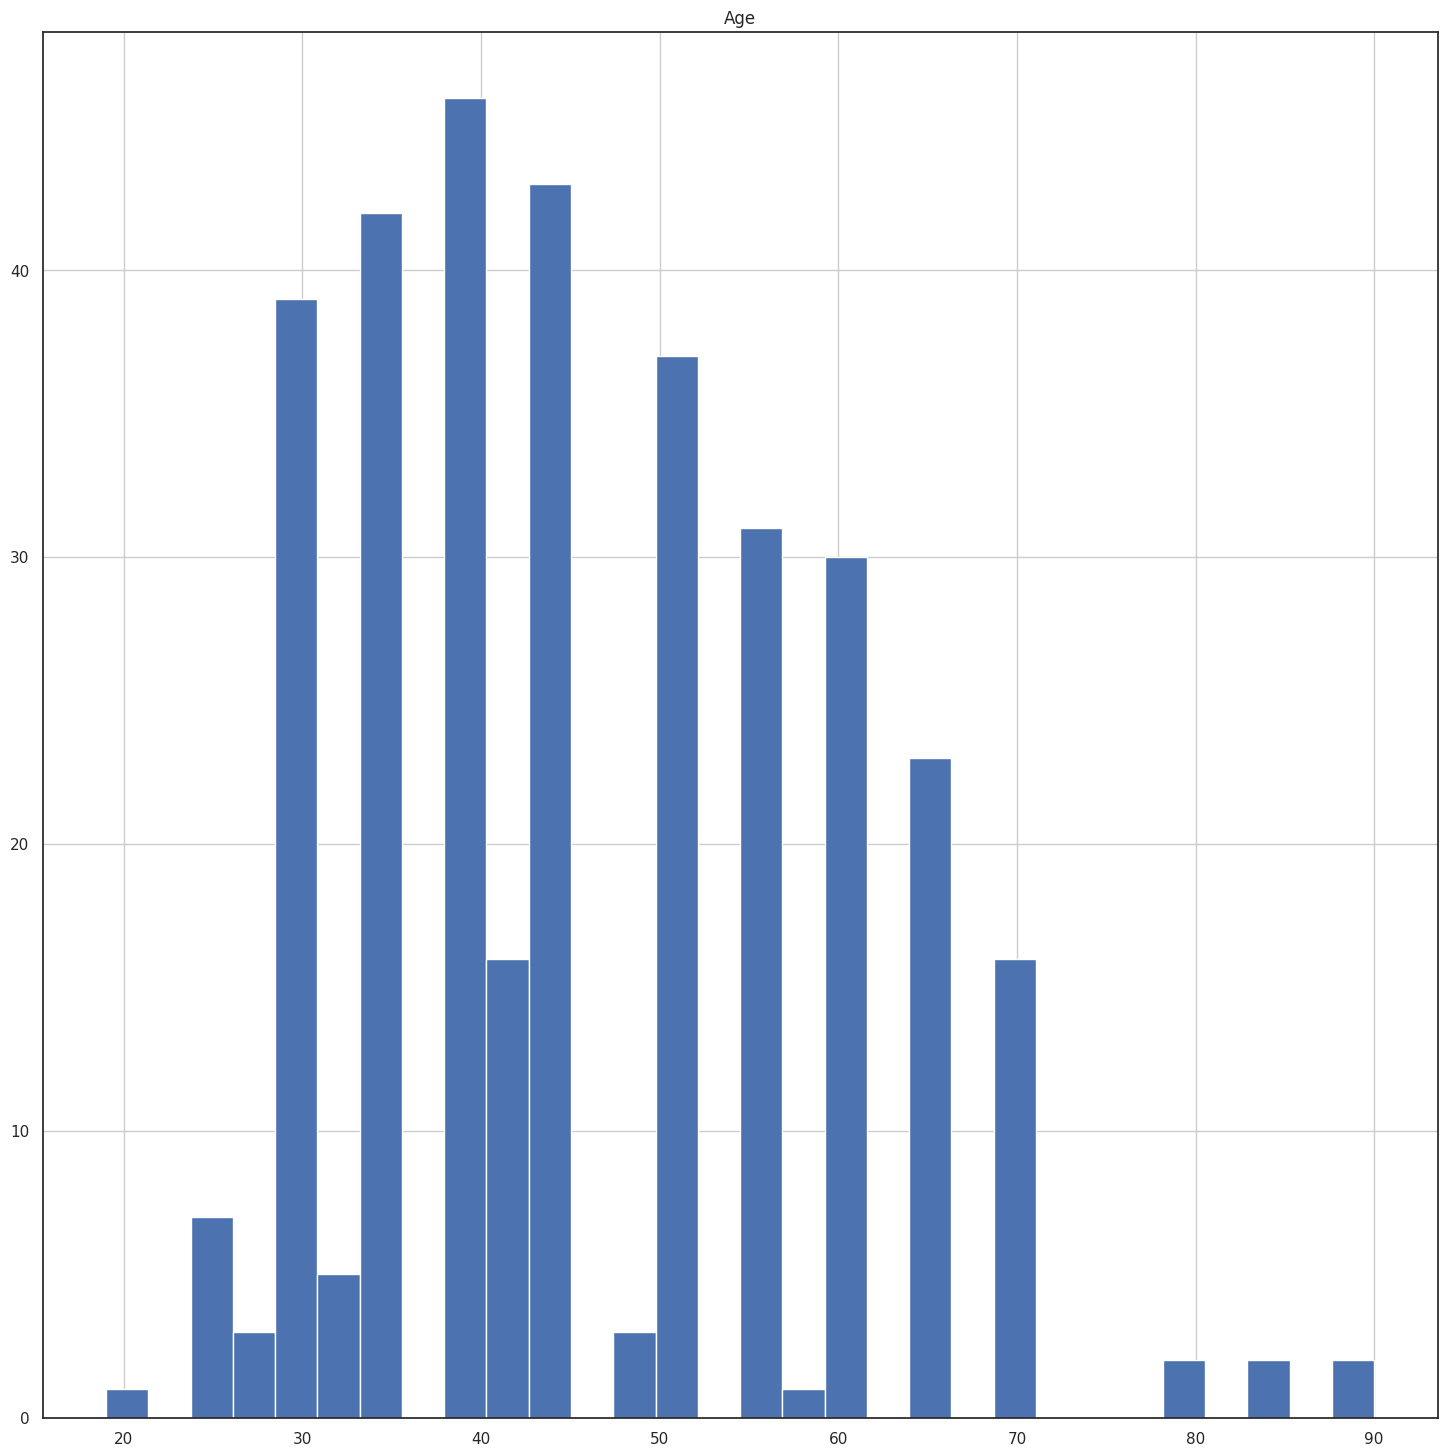

In [ ]:
# Display figures for columns
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
df.hist(ax=ax,bins =30)
plt.show()

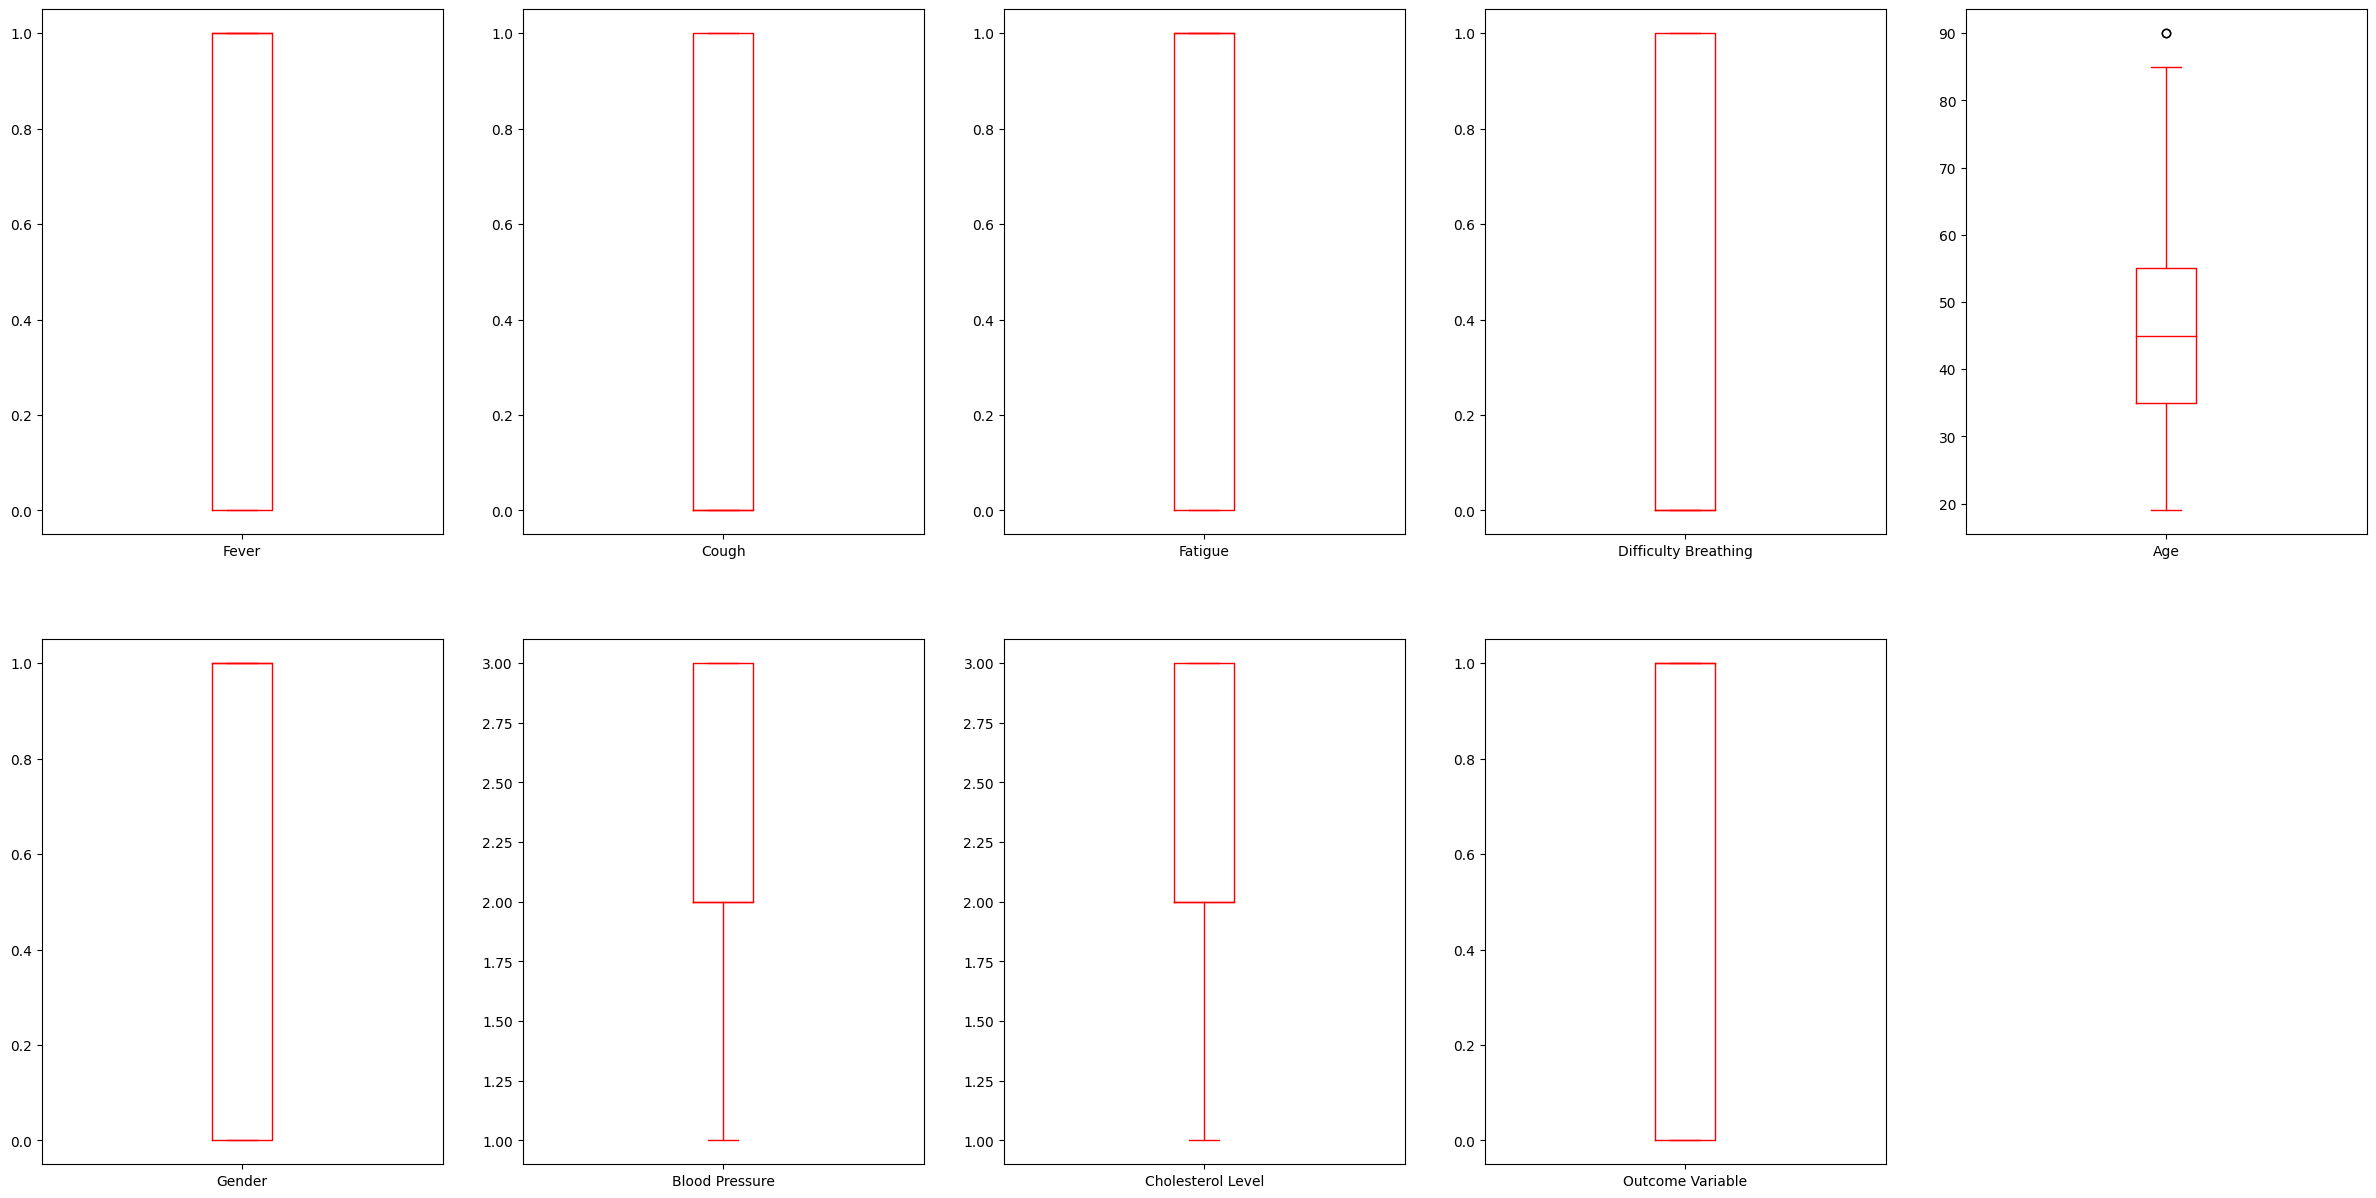

In [ ]:
# Detecting outliers
df.plot(kind='box', subplots=True,
layout=(2,5),sharex=False,sharey=False, figsize=(30, 15), color='red');

In [ ]:
# Detect diseases with a higher frequency

# Use the value_counts() method to count the occurrences of each value in the 'Disease' column
disease_counts = df['Disease'].value_counts()

# Filter the counts to include only values with a frequency of 10 or higher
frequent_diseases = disease_counts[disease_counts >= 10]

# Get the list of unique values meeting the condition
frequent_disease_values = frequent_diseases.index.tolist()

print("The unique values with a frequency of 10 or higher in the 'Disease' column are:")
for disease_value in frequent_disease_values:
    print(disease_value)

The unique values with a frequency of 10 or higher in the 'Disease' column are:
Asthma
Stroke
Osteoporosis
Hypertension
Diabetes
Migraine


In [ ]:
# Filter rows to those that have a frequency of 10 or higher
# List of specified disease values to keep
specified_diseases = ["Asthma", "Stroke", "Osteoporosis", "Hypertension", "Diabetes", "Migraine"]

# Filter the rows based on specified values in the 'Disease' column
filtered_df = df[df['Disease'].isin(specified_diseases)]

# 'filtered_df' will now contain only the rows with one of the specified disease values

In [ ]:
# View new filtered DataFrame
filtered_df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
3,Asthma,1,1,0,1,25,0,2,2,1
4,Asthma,1,1,0,1,25,0,2,2,1
10,Asthma,1,0,0,1,28,0,3,2,1
14,Diabetes,0,0,0,0,29,0,1,2,0
20,Stroke,1,1,1,1,29,1,2,2,1


In [ ]:
filtered_df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,1,0,1,0,80,1,3,3,1
345,Stroke,1,0,1,0,85,0,3,3,1
346,Stroke,1,0,1,0,85,0,3,3,1
347,Stroke,1,0,1,0,90,1,3,3,1
348,Stroke,1,0,1,0,90,1,3,3,1


In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 3 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               83 non-null     object
 1   Fever                 83 non-null     int64 
 2   Cough                 83 non-null     int64 
 3   Fatigue               83 non-null     int64 
 4   Difficulty Breathing  83 non-null     int64 
 5   Age                   83 non-null     int64 
 6   Gender                83 non-null     int64 
 7   Blood Pressure        83 non-null     int64 
 8   Cholesterol Level     83 non-null     int64 
 9   Outcome Variable      83 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 7.1+ KB


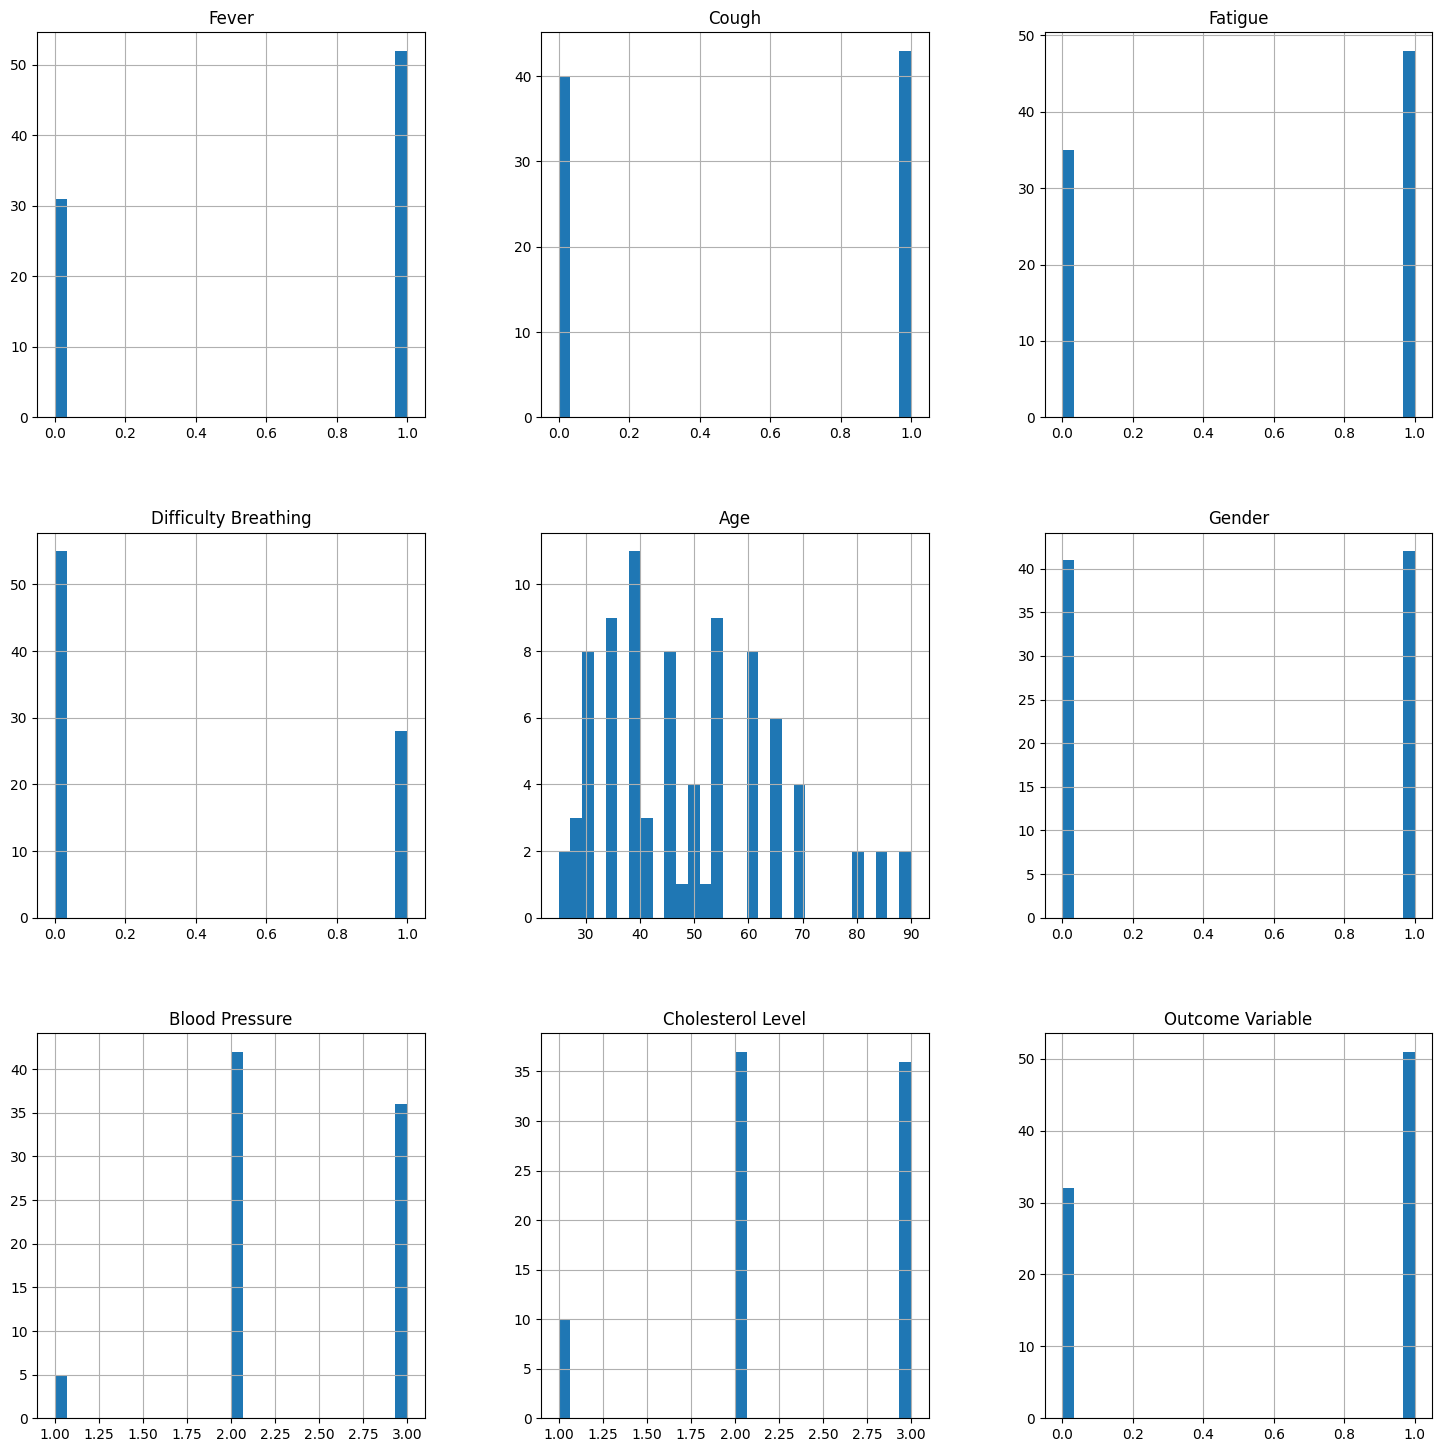

In [ ]:
# Display figures for columns for Filtered DataFrame
fig = plt.figure(figsize =(18,18))
ax=fig.gca()
filtered_df.hist(ax=ax,bins =30)
plt.show()

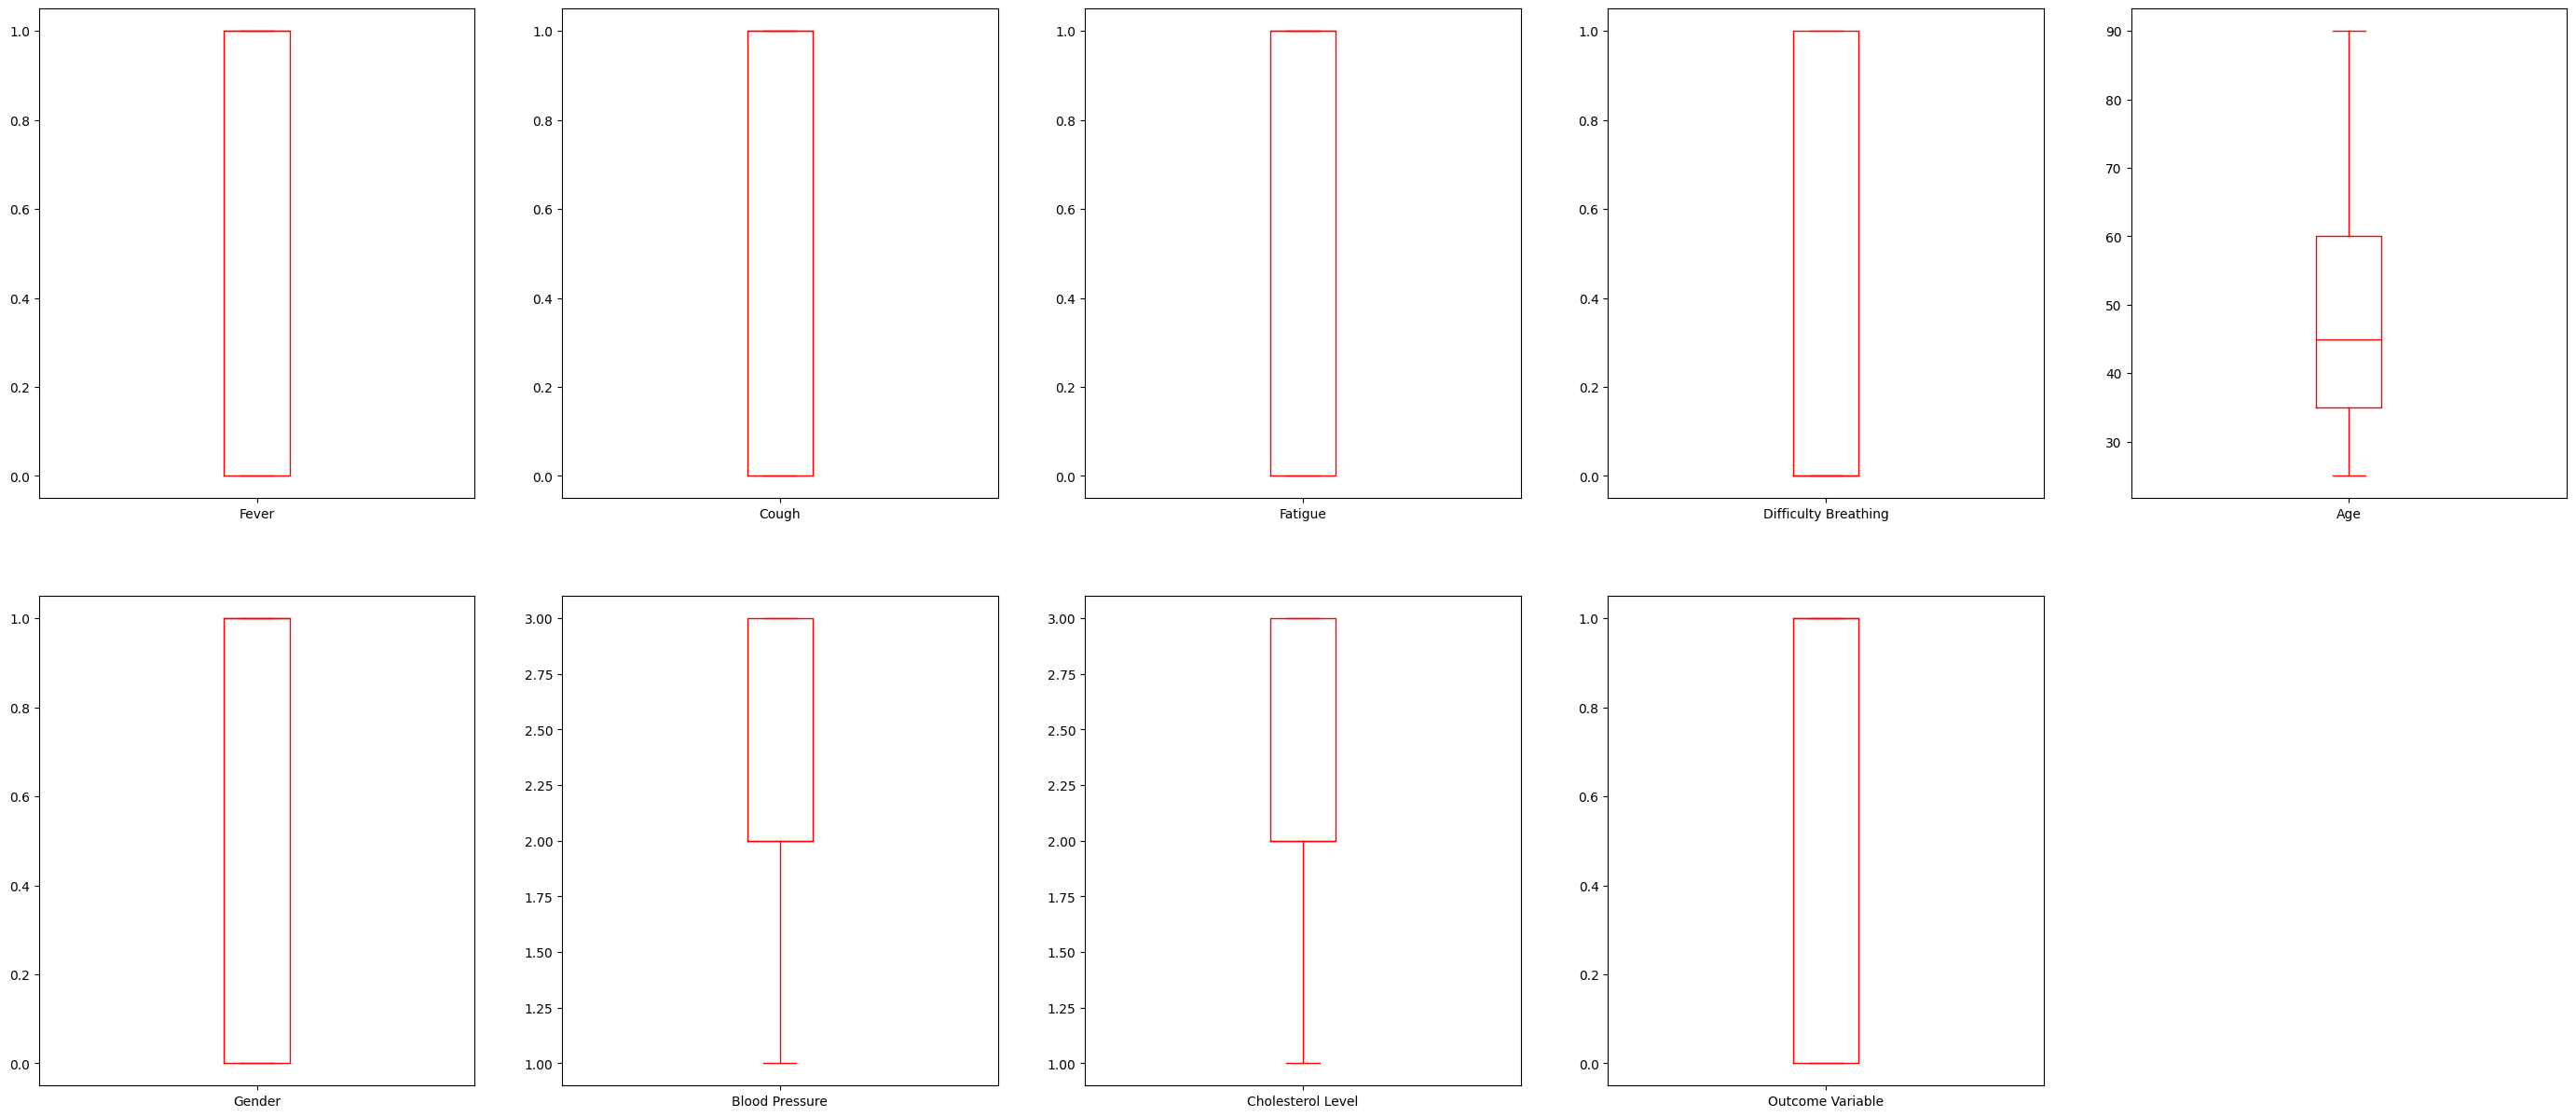

In [ ]:
# Detecting outliers for Filtered DataFrame
filtered_df.plot(kind='box', subplots=True,
layout=(2,5),sharex=False,sharey=False, figsize=(35, 15), color='red');

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 3 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Disease               83 non-null     float64
 1   Fever                 83 non-null     float64
 2   Cough                 83 non-null     float64
 3   Fatigue               83 non-null     float64
 4   Difficulty Breathing  83 non-null     float64
 5   Age                   83 non-null     float64
 6   Gender                83 non-null     float64
 7   Blood Pressure        83 non-null     float64
 8   Cholesterol Level     83 non-null     float64
 9   Outcome Variable      83 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 9.2 KB


In [ ]:
# Filter out empty rows
# Step 1: Remove Empty Rows
filtered_df = filtered_df.dropna()

In [ ]:
filtered_df.shape

(83, 10)

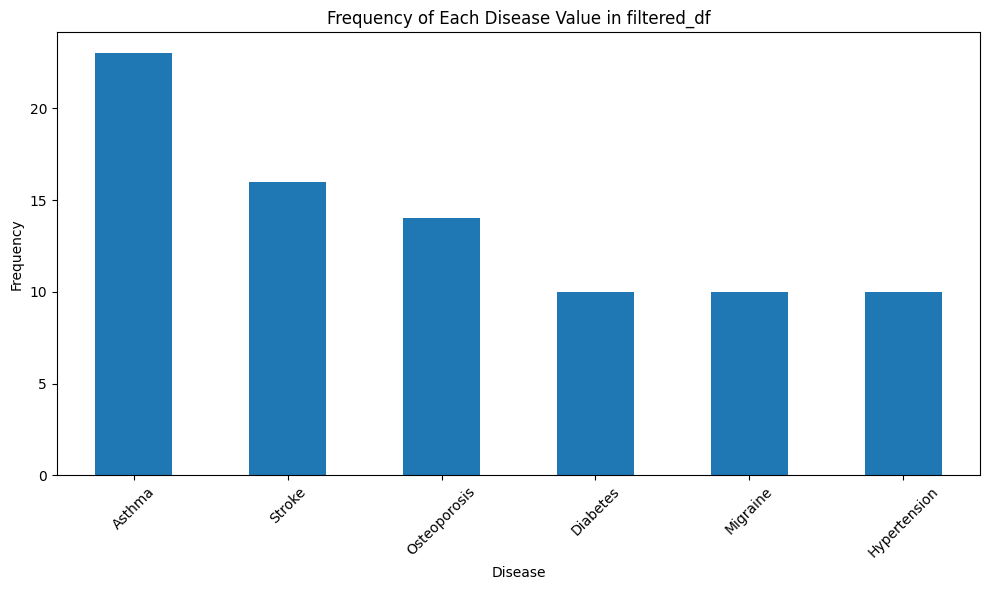

In [ ]:
# Bar Chart of Disease Frequency
disease_counts = filtered_df['Disease'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar')
plt.title("Frequency of Each Disease Value in filtered_df")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the chart
plt.show()

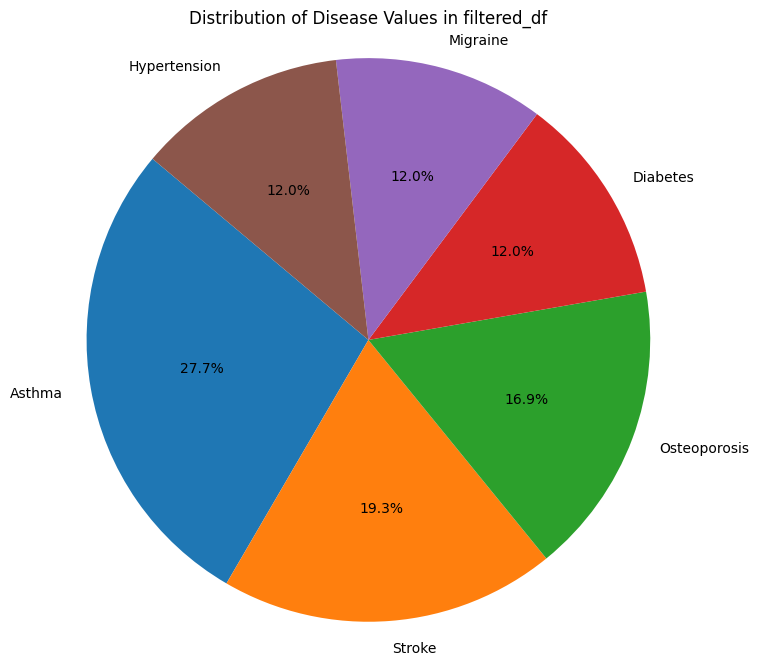

In [ ]:
# Displays Distribution of disease values with a percentage
disease_counts = filtered_df['Disease'].value_counts()

# Create a pie chart with percentages
plt.figure(figsize=(8, 8))
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Disease Values in filtered_df")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the chart
plt.show()

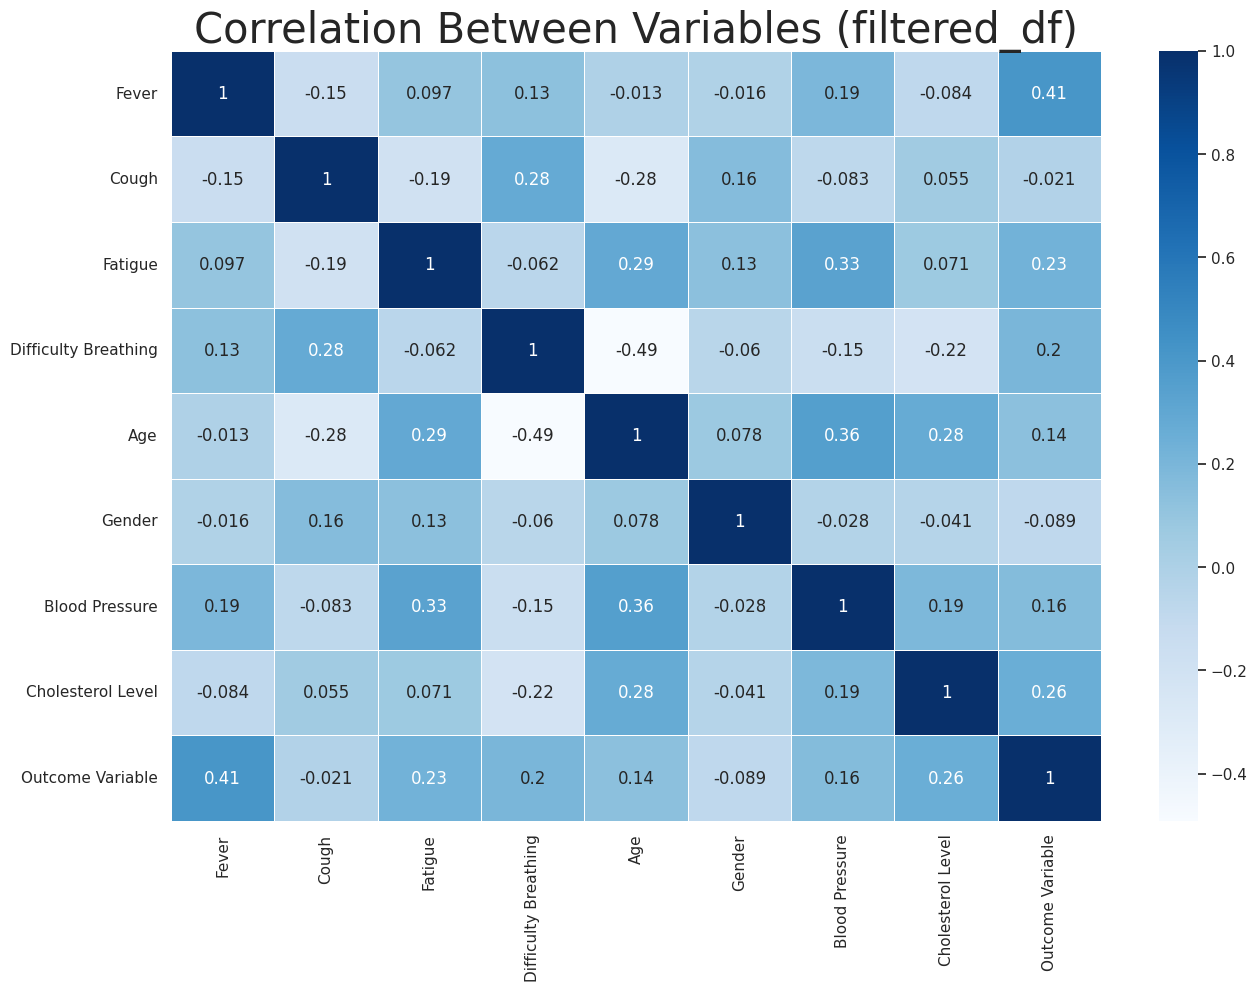

In [ ]:
#check correlation between variables
sns.set(style="white")
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(filtered_df.corr(), annot=True, linewidths=.5, cmap="Blues")
plt.title('Correlation Between Variables (filtered_df)', fontsize=30)
plt.show()


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 22.6 MB 25.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.8 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357350 sha256=f0713756affac0fd9a923b2479e44d7fe348cb8365c5531c494d7e28ec5a9338
  Stored in directory: /tmp/pip-ephem-wheel-cache-5ygsm8j4/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=05e1661022ed0e3cb12429ebe1c1b12272e6eb54d806b2848d7585ab67513ff5
  Stored in directory: /root/.

In [ ]:
#obtain full profiler report
#restart kernel
#re-run import libraries and data
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(filtered_df,title="Disease Symptoms EDA",
html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# pre-processing
from sklearn.exceptions import DataDimensionalityWarning
# encode object columns to integers
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

for col in filtered_df:
  if filtered_df[col].dtype =='object':
    filtered_df[col]=OrdinalEncoder().fit_transform(filtered_df[col].values.reshape(-1,1))
filtered_df


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
3,0.0,1,1,0,1,25,0,2,2,1
4,0.0,1,1,0,1,25,0,2,2,1
10,0.0,1,0,0,1,28,0,3,2,1
14,1.0,0,0,0,0,29,0,1,2,0
20,5.0,1,1,1,1,29,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...
344,5.0,1,0,1,0,80,1,3,3,1
345,5.0,1,0,1,0,85,0,3,3,1
346,5.0,1,0,1,0,85,0,3,3,1
347,5.0,1,0,1,0,90,1,3,3,1


In [ ]:
# Normalise Data
class_label_filtered = filtered_df['Outcome Variable']
filtered_df = filtered_df.drop(['Outcome Variable'], axis=1)
filtered_df = (filtered_df - filtered_df.min()) / (filtered_df.max() - filtered_df.min())
filtered_df['Outcome Variable'] = class_label_filtered

In [ ]:
# Pre-processing
symptom_data = filtered_df.copy()
le = preprocessing.LabelEncoder()

# Encoding for different columns
symptom_data["Disease"] = le.fit_transform(list(symptom_data["Disease"]))
symptom_data["Fever"] = le.fit_transform(list(symptom_data["Fever"])) # Fever (1 = yes; 0 = no)
symptom_data["Cough"] = le.fit_transform(list(symptom_data["Cough"])) # Coughing (1 = yes; 0 = no)
symptom_data["Fatigue"] = le.fit_transform(list(symptom_data["Fatigue"])) # Fatigue (1 = yes; 0 = no)
symptom_data["Difficulty Breathing"] = le.fit_transform(list(symptom_data["Difficulty Breathing"])) # Difficulty Breathing (1 = yes; 0 = no)
symptom_data["Age"] = le.fit_transform(list(symptom_data["Age"]))  # Age in years
symptom_data["Gender"] = le.fit_transform(list(symptom_data["Gender"]))  # Gender (1 = male; 0 = female)
symptom_data["Blood Pressure"] = le.fit_transform(list(symptom_data["Blood Pressure"]))  # Blood Pressure
symptom_data["Cholesterol Level"] = le.fit_transform(list(symptom_data["Cholesterol Level"]))  # Cholesterol Level
symptom_data["Outcome Variable"] = le.fit_transform(list(symptom_data["Outcome Variable"]))  # Outcome Variable


In [ ]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split


# Define (x) and target variable (y)
x = symptom_data[['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age', 'Gender', 'Blood Pressure', 'Cholesterol Level']]
y = symptom_data['Outcome Variable']

# Test options and evaluation metric
num_folds = 5
seed = 7
scoring = 'accuracy'

# Model Test/Train
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed)


In [ ]:
#size of train and test subsets after splitting
np.shape(x_train), np.shape(x_test)

((66, 9), (17, 9))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
models = []
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
DT: 0.725275 (0.106995)

NB: 0.725275 (0.160153)

SVM: 0.619780 (0.112196)

GBM: 0.710989 (0.078292)

RF: 0.680220 (0.093271)



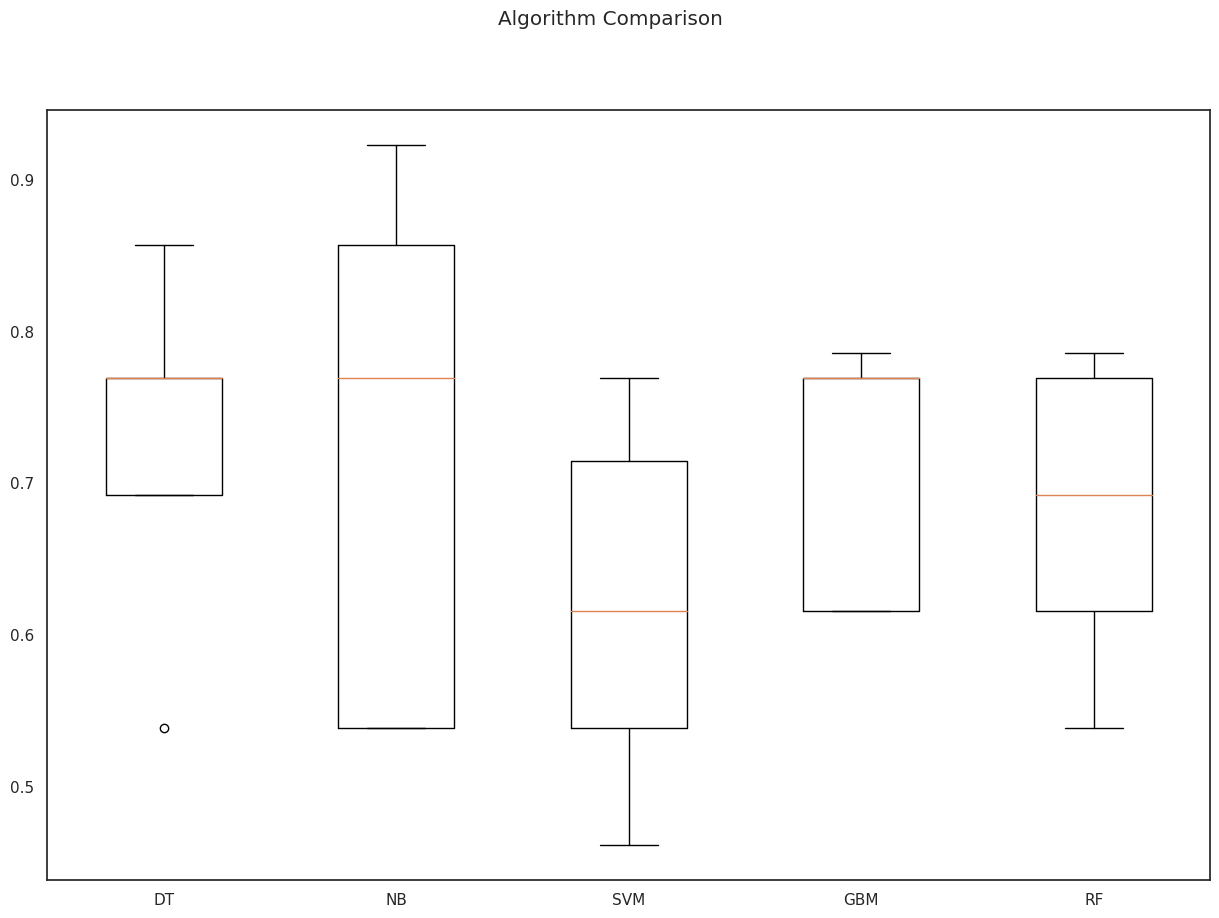

In [ ]:
# Compare Algorithms' Performance
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Model Evaluation by testing with independent/external test data set.
# Make predictions on validation/test dataset
#Model Evaluation by testing with independent/external test data set.
# Make predictions on validation/test dataset
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
best_model = gb
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 0.8235294117647058


In [ ]:
#Model Performance Evaluation Metric 1 -Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.82      0.90      0.86        10

    accuracy                           0.82        17
   macro avg       0.83      0.81      0.81        17
weighted avg       0.82      0.82      0.82        17



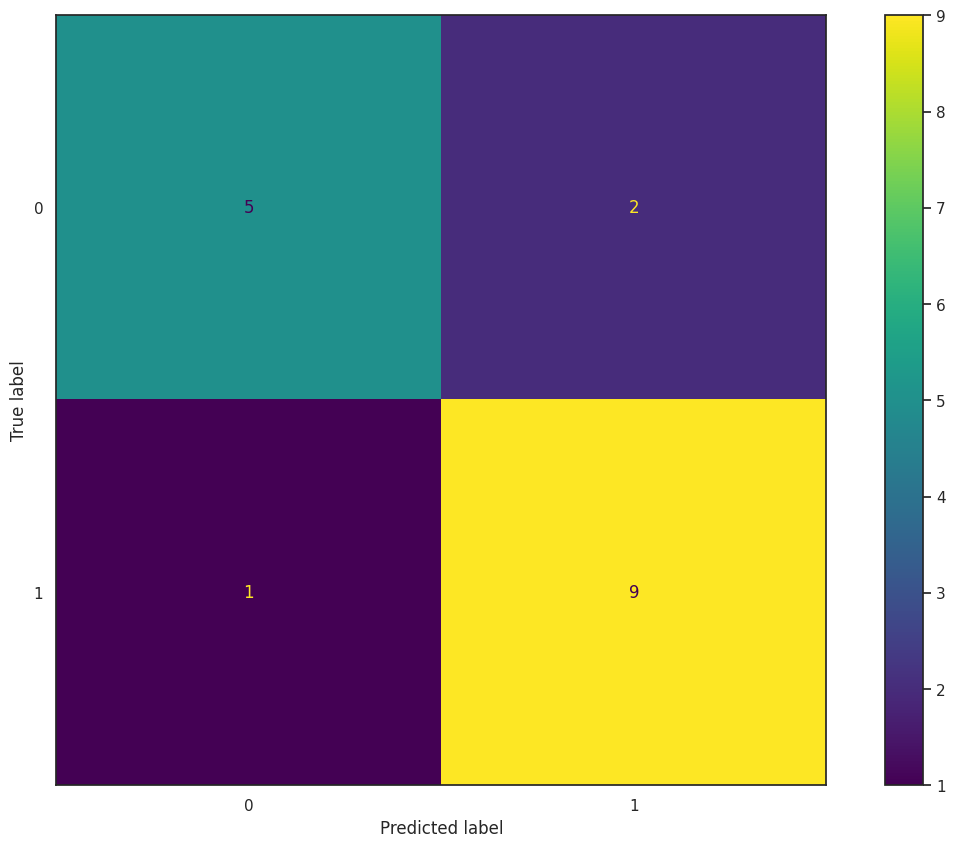

In [ ]:
#Model Performance Evaluation Metric 2
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

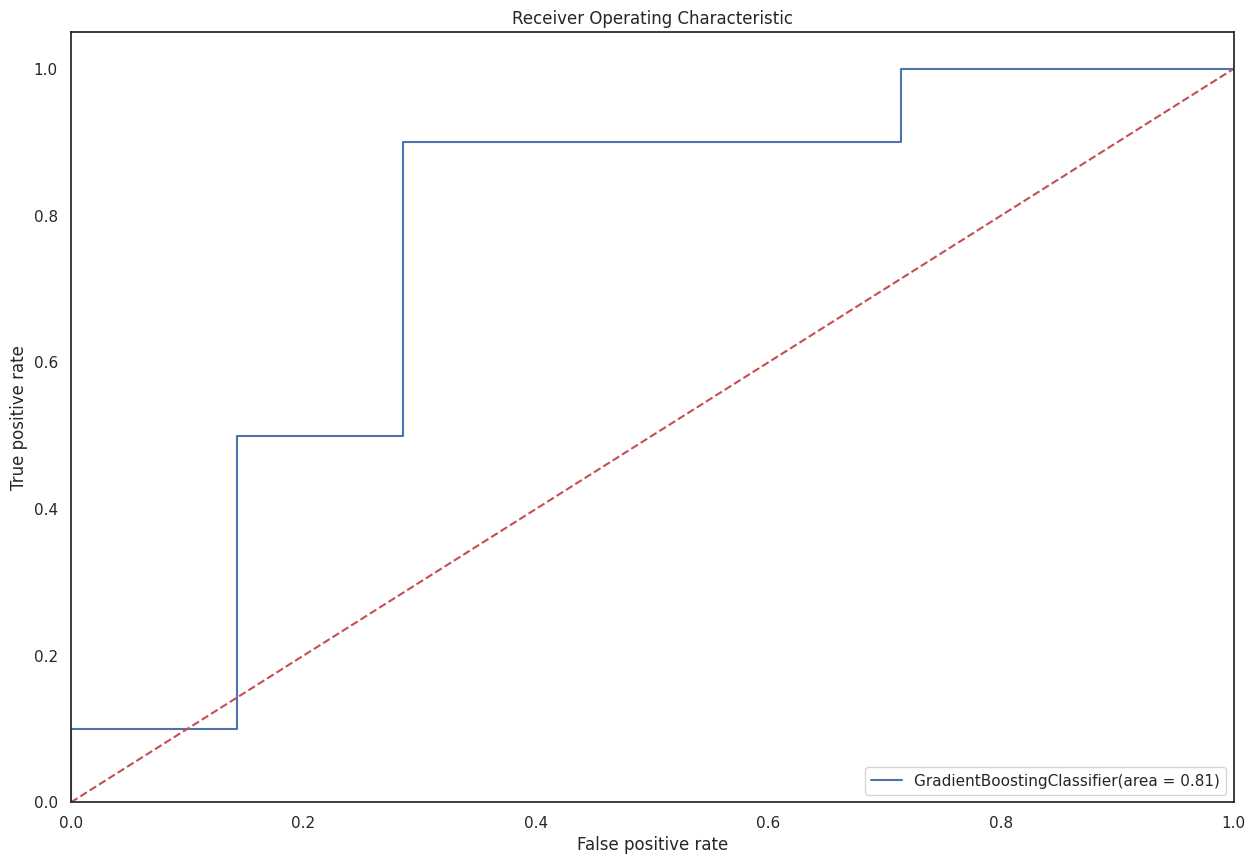

In [ ]:
#Model Evaluation Metric 3- ROC-AUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
best_model = gb
best_model.fit(x_train, y_train)
rf_roc_auc = roc_auc_score(y_test,best_model.predict(x_test))
fpr,tpr,thresholds = roc_curve(y_test, best_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'GradientBoostingClassifier(area = %0.2f)'% rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('LOC_ROC')
plt.show()

In [ ]:
#Model Evaluation Metric 4-prediction report
for x in range(len(y_pred)):
    print("Predicted: ", y_pred[x], "Actual: ", y_test.iloc[x], "Data: ", x_test.iloc[x])

Predicted:  0 Actual:  0 Data:  Disease                  2
Fever                    0
Cough                    1
Fatigue                  0
Difficulty Breathing     0
Age                     13
Gender                   1
Blood Pressure           1
Cholesterol Level        0
Name: 250, dtype: int64
Predicted:  1 Actual:  1 Data:  Disease                 0
Fever                   1
Cough                   1
Fatigue                 0
Difficulty Breathing    1
Age                     5
Gender                  0
Blood Pressure          1
Cholesterol Level       1
Name: 75, dtype: int64
Predicted:  1 Actual:  0 Data:  Disease                 1
Fever                   1
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     7
Gender                  1
Blood Pressure          2
Cholesterol Level       2
Name: 116, dtype: int64
Predicted:  1 Actual:  1 Data:  Disease                 4
Fever                   1
Cough                   1
Fatigue     